# K Nearest Neighbours (KNN)

#### Written by Dhrub Satyam

KNN algorithm is the most intutitive classification algorithm that we will use to introduce the concept of classification

#### What is KNN?

KNN is a non-parametric, instance based algorithm used in a supervised learning setting.

#### What does the K stand for?

K is a hyperparameter which is chosen arbitrarily by the user and will determine how many nearest neighbours does the algorithm look for, for a certain point A.

For instance, if K = 3, the algorithm will look for the nearest 3 points around an unlabelled point A, to determine the label for the point.

#### How does the algorithm determine the distance between the points?

The most common distance measure is the euclidean distance (essentially pythagoras theorem).


### Objective: To Implement K-Nearest Neighbours

Steps:

1. Read in dataset, and understand the features
2. Separate dataset into training set and testing set
3. Training & Testing the model
4. Determining how well the model performs
5. Visualising the outcome


## Reading in the dataset in package

In [1]:
# libraries used
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

# loading dataset from sklearn
iris = pd.read_csv("iris.csv")

#### Asking Questions to Data
1. What is the number of rows and columns of the dataset? 
2. What are the data types in each dataframe?
3. How many of each type of species do we have? etc.

In [2]:
# explore the data here

iris.shape


(150, 6)

In [3]:
iris.head(5)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Implementing KNN Algorithmn

We need to split the dataset into a training and testing set by random sampling, to use the testing set to validate our model.

Why is this important? Given whatever data we have, we don't have the target function to generate more correct answers to see if our model works, so we hide some data from the algorithm and use it to test our model!

In [5]:
# some preprocessing of data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x = iris.iloc[:,1:5].values #selecting all columns except for 'id' and 'Species'
ynames = iris['Species'].values
classnames = []
y = le.fit_transform(ynames)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Lets see by splitting the dataset into 50% training, 50% testing!

In [6]:
# split into train and test
np.random.seed(1234)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=None) 
# If int, random_state is the seed used by the random number generator;
# test_size is the size of the test set = 0.x * num_rows of df

In [7]:
print(x_train.shape) # 75 rows of data, 4 columns
print(y_train.shape) # 75 rows of data, 1 columns

(75, 4)
(75,)


In [8]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

We have 3 classes which is an odd number, hence to avoid instances of ties in majority voting, we will avoid using k = 2, 4,6 (in short avoid using even numbers)

In [9]:
knn.fit(x_train,y_train) # model is created based off training data
y_prediction = knn.predict(x_test) #prediction is churned out

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_prediction)

array([[25,  0,  0],
       [ 0, 24,  1],
       [ 0,  3, 22]])

In [11]:
from sklearn.metrics import accuracy_score
# evaluate the accuracy of the output of the model against the y values of the test set
score = accuracy_score(y_true = y_test, y_pred = y_prediction, normalize = True)
print("%.2f" % score)
# normalize = True will return accuracy of the model, normalize = False will return no. of test data correctly classified

0.95


#### How to choose K

K is a hyperparameter which is often chosen by a 'tuning' process:
1. Have a list of candidate hyper-parameter values
2. Run your chosen algorithm on these values
3. Pick the value with that creates a model with the highest accuracy

The process of tuning is shown below

In [12]:
# Create an iterable to test out values of k from 1 to 30
k_range = range(1, 31)

# Create a dictionary to store the {k (key) : accuracy_score (value)}
scores = []

# Using a for loop to loop through the algorithm with varying k, and append result in dictionary as values.
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test,y_pred))

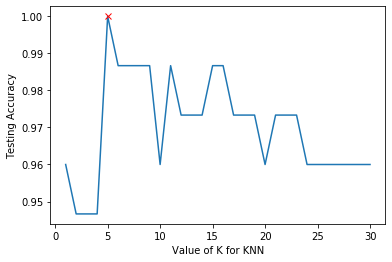

In [13]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range,scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.plot(k_range[scores.index(max(scores))],max(scores),'rx')

We observe that the simple KNN algorithm training on 75 rows of data with n = 5 was able to achieve 100% accuracy in predicting the remaining 75 rows of unseen data. However, with the small size of data, model generalisation is still an issue, and accuracy level might vary with another random sample of data.

#### Drawbacks of KNN

1. Too many dimensions will make the distance calculation very complicated and data points become 'further' away from each other (thus not effective neighbours)
2. You might have realise that the scale of each feature must be the same! if not a feature that is numerically smaller than other features will always be more significant!
3. Not very model based, hence you can't quite explain the results of the model after you use this (someone might want to help me phrase this better)

#### References

1. [Sci-kit learn's documentation on KNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
2. [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance)